# Reproducing “Flavor network and the principles of food pairing” by Ahn et al.

In [581]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import itertools

%matplotlib inline

## Reading in the Data

Data can be found in the supplemental materials of the Ahn et al. paper.

In [8]:
common_flavors_df = pd.read_csv('srep00196-s2.csv', skiprows=range(3))
common_flavors_df

,,#
black_sesame_seed,rose_wine,3
fennel,wild_berry,5
comte_cheese,grape,57
nira,raw_beef,1
corn_mint_oil,parsnip_fruit,2
...,...,...
eucalyptus_dives,peppermint,1
clam,orange_juice,6
raw_lamb,roasted_spanish_peanut,1
bacon,cashew,6


In [18]:
common_flavors_df = common_flavors_df.reset_index().rename({'level_0':'ingredient_1', 'level_1':'ingredient_2'}, axis=1)
common_flavors_df


,ingredient_1,ingredient_2,#
0,black_sesame_seed,rose_wine,3
1,fennel,wild_berry,5
2,comte_cheese,grape,57
3,nira,raw_beef,1
4,corn_mint_oil,parsnip_fruit,2
...,...,...,...
221772,eucalyptus_dives,peppermint,1
221773,clam,orange_juice,6
221774,raw_lamb,roasted_spanish_peanut,1
221775,bacon,cashew,6


In [14]:
# Input
data_file = "srep00196-s3.csv"

# Delimiter
data_file_delimiter = ','

# The max column count a line in the file could have
largest_column_count = 0

# Loop the data lines
with open(data_file, 'r') as temp_f:
    # Read the lines
    lines = temp_f.readlines()

    for l in lines:
        # Count the column count for the current line
        column_count = len(l.split(data_file_delimiter)) + 1
        
        # Set the new most column count
        largest_column_count = column_count if largest_column_count < column_count else largest_column_count

# Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
column_names = [i for i in range(0, largest_column_count)]

# Read csv
recipes_df = pd.read_csv(data_file, skiprows=range(4), names=['region'] + column_names[:-1])
recipes_df

/var/folders/dv/9r1wf3bn7d3d9_sc9zbs77km0000gn/T/ipykernel_63795/4185306732.py:26: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  recipes_df = pd.read_csv(data_file, skiprows=range(4), names=['region'] + column_names[:-1])


,region,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,African,chicken,cinnamon,soy_sauce,onion,ginger,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African,cane_molasses,ginger,cumin,garlic,tamarind,bread,coriander,vinegar,onion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,African,butter,pepper,onion,cardamom,cayenne,ginger,cottage_cheese,garlic,brassica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,African,olive_oil,pepper,wheat,beef,onion,cardamom,cumin,garlic,rice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,African,honey,wheat,yeast,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56493,WesternEuropean,cane_molasses,butter,wheat,whiskey,vanilla,egg,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56494,WesternEuropean,lemon_juice,wheat,onion,parsley,celery,nutmeg,vegetable_oil,chicken,egg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56495,WesternEuropean,butter,wheat,onion,beef,bacon,black_pepper,parsley,beer,garlic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56496,WesternEuropean,lemon,onion,black_pepper,white_wine,celery,carrot,mussel,bay,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
shrimp_scampi_and_tomato_boil = ['shrimp', 'white_wine', 'mozzarella_cheese', 'parmesan_cheese', 'olive_oil',\
                                 'parsley', 'tomato', 'garlic']
seasoned_mussels = ['garlic', 'scallion', 'sesame_oil', 'starch', 'soy_sauce', 'nut', 'black_pepper', 'sake', 'mussel']

shrimp_scampi_and_seasoned_mussels_df = common_flavors_df.loc[common_flavors_df['ingredient_1'].isin(shrimp_scampi_and_tomato_boil + seasoned_mussels)\
                                           & common_flavors_df['ingredient_2'].isin(shrimp_scampi_and_tomato_boil + seasoned_mussels)]

shrimp_scampi_and_seasoned_mussels_df

,ingredient_1,ingredient_2,#
4239,nut,shrimp,3
5589,nut,sesame_oil,1
6132,mozzarella_cheese,sake,15
7171,soy_sauce,tomato,2
8785,olive_oil,tomato,1
...,...,...,...
209438,mozzarella_cheese,white_wine,81
209978,parmesan_cheese,shrimp,42
212570,sake,shrimp,10
216157,mussel,tomato,7


## Figure B

(B) If we project the ingredient-compound bipartite network into the ingredient space, we obtain the flavor network, whose nodes are ingredients, linked if they share at least one flavor compound. The thickness of links represents the number of flavor compounds two ingredients share and the size of each circle corresponds to the prevalence of the ingredients in recipes. 

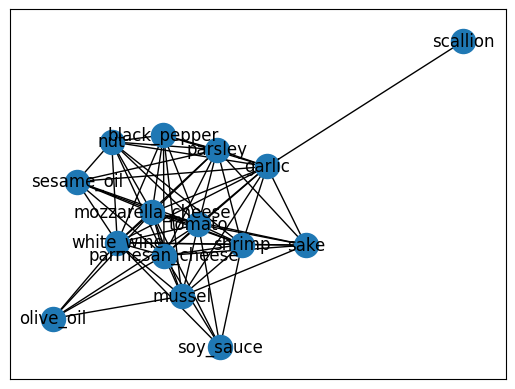

In [31]:
shrimp_scampi_and_seasoned_mussels_g = nx.from_pandas_edgelist(shrimp_scampi_and_seasoned_mussels_df,source='ingredient_1', target = 'ingredient_2', edge_attr=True)
nx.draw_networkx(shrimp_scampi_and_seasoned_mussels_g)

In [36]:
string_to_check = 'garlic'

# Check if the string is present in any part of the DataFrame
recipes_df.apply(lambda row: row.astype(str).str.contains(string_to_check, case=False).any(), axis=1).mean()

0.2990017345746752

In [43]:
size_map = []
for i in shrimp_scampi_and_seasoned_mussels_g.nodes():
    size_map.append(recipes_df.apply(lambda row: row.astype(str).str.contains(i, case=False).any(), axis=1).mean())

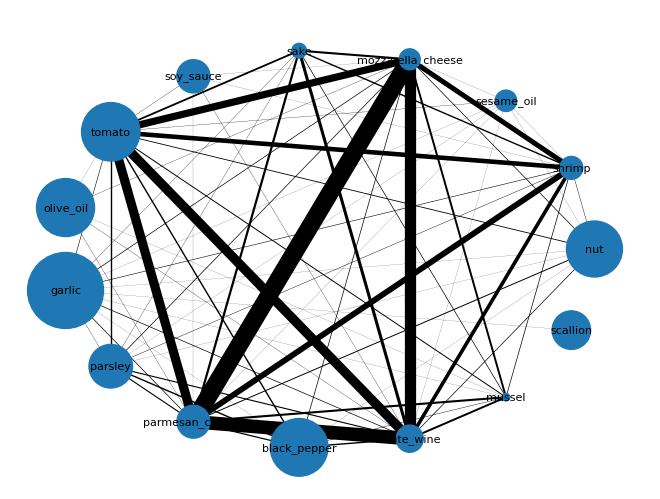

In [51]:
edges = shrimp_scampi_and_seasoned_mussels_g.edges()
weights = [shrimp_scampi_and_seasoned_mussels_g[u][v]['#']/10 for u,v in edges]
nx.draw_circular(shrimp_scampi_and_seasoned_mussels_g, with_labels=True, node_size=[i*10000 for i in size_map], font_size=8, width=weights)

## Figure C

(C) The distribution of recipe size, capturing the number of ingredients per recipe, across the five cuisines explored in our study.

In [61]:
recipes_df['region'].value_counts().index

Index(['NorthAmerican', 'SouthernEuropean', 'LatinAmerican', 'WesternEuropean',
       'EastAsian', 'MiddleEastern', 'SouthAsian', 'SoutheastAsian',
       'EasternEuropean', 'African', 'NorthernEuropean'],
      dtype='object', name='region')

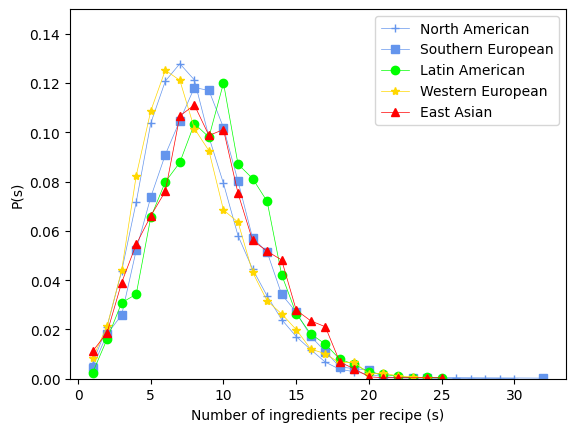

In [120]:
North_American_count_dist = (recipes_df.loc[recipes_df['region']=='NorthAmerican'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(North_American_count_dist.index, North_American_count_dist.values, '+-', c='cornflowerblue', label='North American', linewidth=.5) 

SouthernEuropean_count_dist = (recipes_df.loc[recipes_df['region']=='SouthernEuropean'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(SouthernEuropean_count_dist.index, SouthernEuropean_count_dist.values, 's-', c='cornflowerblue', label='Southern European', linewidth=.5)

LatinAmerican_count_dist = (recipes_df.loc[recipes_df['region']=='LatinAmerican'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(LatinAmerican_count_dist.index, LatinAmerican_count_dist.values, 'o-', c='lime', label='Latin American', linewidth=.5)


WesternEuropean_count_dist = (recipes_df.loc[recipes_df['region']=='WesternEuropean'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(WesternEuropean_count_dist.index, WesternEuropean_count_dist.values, '*-', c='gold', label='Western European', linewidth=.5)

EastAsian_count_dist = (recipes_df.loc[recipes_df['region']=='EastAsian'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(EastAsian_count_dist.index, EastAsian_count_dist.values, '^-', c='red', label='East Asian', linewidth=.5)

MiddleEastern_count_dist = (recipes_df.loc[recipes_df['region']=='MiddleEastern'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


SouthAsian_count_dist = (recipes_df.loc[recipes_df['region']=='SouthAsian'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


SoutheastAsian_count_dist = (recipes_df.loc[recipes_df['region']=='SoutheastAsian'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


African_count_dist = (recipes_df.loc[recipes_df['region']=='African'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


NorthernEuropean_count_dist = (recipes_df.loc[recipes_df['region']=='NorthernEuropean'].count(axis=1) - 1).value_counts(normalize=True).sort_index()

plt.ylim([0,.15])
plt.xlabel("Number of ingredients per recipe (s)")
plt.ylabel("P(s)")
plt.legend()

plt.show()


## Figure D

(D) The frequency-rank plot of ingredients across the five cuisines show an approximately invariant distribution across cuisines.

In [723]:
#let's get the frequency-rank plot
NorthAmerican_recipes_df = recipes_df.loc[recipes_df['region']=='NorthAmerican']
NorthAmerican_recipes_df = NorthAmerican_recipes_df.drop(['region'], axis=1)

unique_NorthAmerican = pd.unique(NorthAmerican_recipes_df.values.ravel('K'))
unique_NorthAmerican = [v for v in unique_NorthAmerican if v == v]

NorthAmerican_prevalence = []
for i in unique_NorthAmerican:
    NorthAmerican_prevalence.append(NorthAmerican_recipes_df[NorthAmerican_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/NorthAmerican_recipes_df.shape[0])


In [742]:
NorthAmerican_RankOrder = pd.DataFrame(
    {'ingredient': unique_NorthAmerican,
     'prevalence': NorthAmerican_prevalence
    })
NorthAmerican_RankOrder

,ingredient,prevalence
0,cane_molasses,0.165591
1,scallion,0.055221
2,butter,0.411521
3,tomato,0.140208
4,olive_oil,0.133730
...,...,...
349,ouzo,0.000024
350,mung_bean,0.000024
351,mutton,0.000048
352,chinese_cabbage,0.000024


In [743]:
NorthAmerican_RankOrder.sort_values(['prevalence'], ascending=False)

,ingredient,prevalence
2,butter,0.411521
30,egg,0.403092
12,wheat,0.398131
14,onion,0.296479
77,milk,0.264811
...,...,...
236,angelica,0.000024
319,shellfish,0.000024
158,roasted_nut,0.000024
151,geranium,0.000024


In [724]:
SouthernEuropean_recipes_df = recipes_df.loc[recipes_df['region']=='SouthernEuropean']
SouthernEuropean_recipes_df = SouthernEuropean_recipes_df.drop(['region'], axis=1)

unique_SouthernEuropean = pd.unique(SouthernEuropean_recipes_df.values.ravel('K'))
unique_SouthernEuropean = [v for v in unique_SouthernEuropean if v == v]

SouthernEuropean_prevalence = []
for i in unique_SouthernEuropean:
    SouthernEuropean_prevalence.append(SouthernEuropean_recipes_df[SouthernEuropean_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/SouthernEuropean_recipes_df.shape[0])

SouthernEuropean_RankOrder = pd.DataFrame(
    {'ingredient': unique_SouthernEuropean,
     'prevalence': SouthernEuropean_prevalence
    })

    
LatinAmerican_recipes_df = recipes_df.loc[recipes_df['region']=='LatinAmerican']
LatinAmerican_recipes_df = LatinAmerican_recipes_df.drop(['region'], axis=1)

unique_LatinAmerican = pd.unique(LatinAmerican_recipes_df.values.ravel('K'))
unique_LatinAmerican = [v for v in unique_LatinAmerican if v == v]

LatinAmerican_prevalence = []
for i in unique_LatinAmerican:
    LatinAmerican_prevalence.append(LatinAmerican_recipes_df[LatinAmerican_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/LatinAmerican_recipes_df.shape[0])
    
LatinAmerican_RankOrder = pd.DataFrame(
    {'ingredient': unique_LatinAmerican,
     'prevalence': LatinAmerican_prevalence
    })

    
WesternEuropean_recipes_df = recipes_df.loc[recipes_df['region']=='WesternEuropean']
WesternEuropean_recipes_df = WesternEuropean_recipes_df.drop(['region'], axis=1)

unique_WesternEuropean = pd.unique(WesternEuropean_recipes_df.values.ravel('K'))
unique_WesternEuropean = [v for v in unique_WesternEuropean if v == v]

WesternEuropean_prevalence = []
for i in unique_WesternEuropean:
    WesternEuropean_prevalence.append(WesternEuropean_recipes_df[WesternEuropean_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/WesternEuropean_recipes_df.shape[0])
    
WesternEuropean_RankOrder = pd.DataFrame(
    {'ingredient': unique_WesternEuropean,
     'prevalence': WesternEuropean_prevalence
    })

    
EastAsian_recipes_df = recipes_df.loc[recipes_df['region']=='EastAsian']
EastAsian_recipes_df = EastAsian_recipes_df.drop(['region'], axis=1)

unique_EastAsian = pd.unique(EastAsian_recipes_df.values.ravel('K'))
unique_EastAsian = [v for v in unique_EastAsian if v == v]

EastAsian_prevalence = []
for i in unique_EastAsian:
    EastAsian_prevalence.append(EastAsian_recipes_df[EastAsian_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/EastAsian_recipes_df.shape[0])
    
EastAsian_RankOrder = pd.DataFrame(
    {'ingredient': unique_EastAsian,
     'prevalence': EastAsian_prevalence
    })



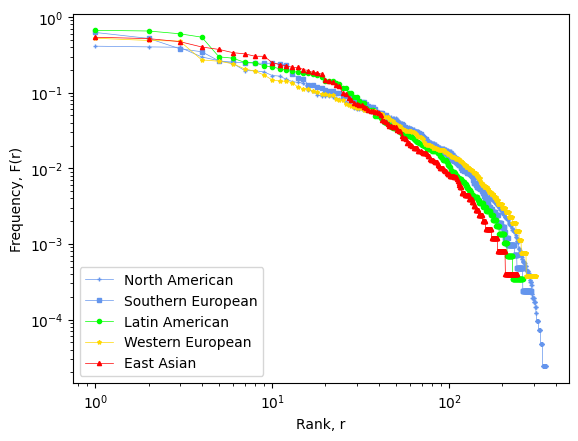

In [744]:
point_size = 3

plt.plot(range(1,NorthAmerican_RankOrder.shape[0]+1), NorthAmerican_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, '+-', c='cornflowerblue', label='North American', linewidth=.5, markersize=point_size) 
plt.plot(range(1,SouthernEuropean_RankOrder.shape[0]+1), SouthernEuropean_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, 's-', c='cornflowerblue', label='Southern European', linewidth=.5, markersize=point_size)
plt.plot(range(1,LatinAmerican_RankOrder.shape[0]+1), LatinAmerican_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, 'o-', c='lime', label='Latin American', linewidth=.5, markersize=point_size)
plt.plot(range(1,WesternEuropean_RankOrder.shape[0]+1), WesternEuropean_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, '*-', c='gold', label='Western European', linewidth=.5, markersize=point_size)
plt.plot(range(1,EastAsian_RankOrder.shape[0]+1), EastAsian_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, '^-', c='red', label='East Asian', linewidth=.5, markersize=point_size)





plt.xlabel("Rank, r")
plt.ylabel("Frequency, F(r)")
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.show()



## Getting the necessary data to export the food network to Cytoscape

In [358]:
ingredient_g = nx.from_pandas_edgelist(common_flavors_df.rename({'#':'weight'}, axis=1),source='ingredient_1', target = 'ingredient_2', edge_attr=True)


In [722]:
no_region_recipes_df = recipes_df.drop(['region'], axis=1)
unique_foods = pd.unique(no_region_recipes_df.values.ravel('K'))
unique_foods = [v for v in unique_foods if v == v]

prevalence = []
for i in unique_foods:
    prevalence.append(no_region_recipes_df[no_region_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/no_region_recipes_df.shape[0])

attribute_df = pd.DataFrame(
    {'ingredient': unique_foods,
     'prevalence': prevalence
    })

In [133]:
# data from FooDB
food_df = pd.read_csv('Food.csv')
food_df

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
0,1,Angelica,Angelica keiskei,Angelica is a genus of about 60 species of tal...,NaN,Angelica,1.jpg,image/jpeg,111325.0,2012-04-20 09:29:57 UTC,...,Type 1,2011-02-09 00:37:14 UTC,2019-05-14 18:04:13 UTC,NaN,2.0,False,specific,357850.0,True,FOOD00001
1,2,Savoy cabbage,Brassica oleracea var. sabauda,Savoy cabbage (Brassica oleracea convar. capit...,NaN,Savoy cabbage,2.jpg,image/jpeg,155178.0,2012-04-20 09:39:54 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,1216010.0,True,FOOD00002
2,3,Silver linden,Tilia argentea,Tilia tomentosa (Silver Lime in the UK and Sil...,845789.0,Tilia tomentosa,3.jpg,image/jpeg,56367.0,2012-04-20 09:41:25 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-17 16:19:45 UTC,NaN,NaN,False,specific,NaN,True,FOOD00003
3,4,Kiwi,Actinidia chinensis,"The kiwifruit, often shortened to kiwi in many...",506775.0,Kiwifruit,4.jpg,image/jpeg,110661.0,2012-04-20 09:32:21 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,3625.0,True,FOOD00004
4,5,Allium,Allium,Allium haematochiton is a species of wild onio...,42634.0,Allium haematochiton,5.jpg,image/jpeg,341911.0,2012-04-20 09:37:44 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,4678.0,True,FOOD00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1020,Cape gooseberry,Physalis peruviana,"Physalis peruviana, a plant species of the gen...",NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-01-24 17:05:37 UTC,2020-01-24 17:05:37 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00988
988,1021,Herbal tea,NaN,Herbal teas are the beverages made from the in...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 20:55:17 UTC,2020-03-12 20:55:17 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00989
989,1022,Fish oil,NaN,Fish oil is oil derived from the tissues of oi...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 21:00:02 UTC,2020-03-12 21:00:02 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00990
990,1023,Taco shell,NaN,The hard-shell or crispy taco is a tradition t...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 2,2020-03-12 21:01:58 UTC,2020-03-12 21:01:58 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00991


In [135]:
food_df.columns

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at', 'legacy_id', 'food_group',
       'food_subgroup', 'food_type', 'created_at', 'updated_at', 'creator_id',
       'updater_id', 'export_to_afcdb', 'category', 'ncbi_taxonomy_id',
       'export_to_foodb', 'public_id'],
      dtype='object')

In [138]:
food_df['food_group'].unique()

array(['Herbs and Spices', 'Vegetables', 'Fruits', 'Nuts',
       'Cereals and cereal products', 'Pulses', 'Teas', 'Gourds',
       'Coffee and coffee products', 'Soy', 'Cocoa and cocoa products',
       'Beverages', 'Aquatic foods', 'Animal foods',
       'Milk and milk products', 'Eggs', 'Confectioneries',
       'Baking goods', 'Dishes', 'Snack foods', 'Baby foods',
       'Unclassified', 'Fats and oils', 'Herbs and spices', nan],
      dtype=object)

In [139]:
food_df.loc[food_df['food_group']=='Beverages']

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
267,268,Beer,NaN,Beer is an alcoholic beverage produced by the ...,NaN,Beer,268.jpg,image/jpeg,2746.0,2012-04-20 09:44:23 UTC,...,Type 2,2011-02-09 00:37:29 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,True,FOOD00268
275,277,Spirit,NaN,NaN,NaN,Spirit,277.jpg,image/jpeg,194630.0,2012-04-20 09:36:55 UTC,...,Type 2,2011-02-09 00:37:30 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,True,FOOD00276
276,278,Fortified wine,NaN,Fortified wine is wine with an added distilled...,NaN,Fortified wine,278.jpg,image/jpeg,40686.0,2012-04-20 09:33:36 UTC,...,Type 2,2011-02-09 00:37:30 UTC,2019-12-11 19:32:37 UTC,NaN,2.0,False,specific,NaN,False,FOOD00277
277,279,Other alcoholic beverage,NaN,NaN,NaN,Alcoholic_beverage,279.jpg,image/jpeg,73939.0,2012-04-20 09:43:36 UTC,...,Type 2,2011-02-09 00:37:30 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,False,FOOD00278
611,626,Grape wine,NaN,Wine is an alcoholic beverage made from fermen...,NaN,Grape_wine,626.jpg,image/jpeg,24988.0,2012-04-20 09:29:56 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00612
612,627,Berry wine,NaN,NaN,NaN,NaN,627.jpg,image/jpeg,16358.0,2012-04-20 09:34:03 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00613
613,628,Other wine,NaN,NaN,NaN,NaN,628.jpg,image/jpeg,55077.0,2012-04-20 09:37:43 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-12-11 19:37:56 UTC,NaN,2.0,False,specific,NaN,False,FOOD00614
614,629,Apple cider,NaN,Apple cider (also called sweet cider or soft c...,NaN,Apple_cider,629.jpg,image/jpeg,60775.0,2012-04-20 09:30:39 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00615
615,630,Liquor,NaN,"A distilled beverage, spirit, liquor, or hard ...",NaN,Liquor,630.jpg,image/jpeg,175237.0,2012-04-20 09:31:58 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00616
621,639,Vodka,NaN,Vodka is a distilled beverage composed primari...,NaN,Vodka,639.jpg,image/jpeg,85287.0,2012-04-20 09:29:26 UTC,...,Type 2,2011-12-02 17:29:03 UTC,2019-05-14 18:05:28 UTC,2.0,2.0,False,specific,NaN,True,FOOD00622


In [741]:
attribute_df

,ingredient,prevalence
0,chicken,0.093702
1,cane_molasses,0.135492
2,butter,0.367163
3,olive_oil,0.174236
4,honey,0.043948
...,...,...
376,mate,0.000018
377,soybean_oil,0.000035
378,holy_basil,0.000035
379,mutton,0.000053


In [141]:
unique_foods = pd.unique(no_region_recipes_df.values.ravel('K'))
unique_foods = [v for v in unique_foods if v == v]

In [149]:
attribute_df = attribute_df.loc[attribute_df['ingredient'].isin(unique_foods)]
attribute_df

,ingredient,prevalence
11,chicken,0.137722
12,cane_molasses,0.135492
13,butter,0.389005
14,olive_oil,0.174236
15,honey,0.043948
...,...,...
387,mate,0.000018
388,soybean_oil,0.000035
389,holy_basil,0.000035
390,mutton,0.000053


In [171]:
food_group_df = food_df[['id', 'name','food_group']]
food_group_df

,id,name,food_group
0,1,Angelica,Herbs and Spices
1,2,Savoy cabbage,Vegetables
2,3,Silver linden,Herbs and Spices
3,4,Kiwi,Fruits
4,5,Allium,Vegetables
...,...,...,...
987,1020,Cape gooseberry,Fruits
988,1021,Herbal tea,Teas
989,1022,Fish oil,NaN
990,1023,Taco shell,NaN


In [172]:
food_group_df['name'] = food_group_df['name'].str.strip().str.lower().str.replace(" ", "_")
food_group_df

/var/folders/dv/9r1wf3bn7d3d9_sc9zbs77km0000gn/T/ipykernel_63795/1330094091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_group_df['name'] = food_group_df['name'].str.strip().str.lower().str.replace(" ", "_")


,id,name,food_group
0,1,angelica,Herbs and Spices
1,2,savoy_cabbage,Vegetables
2,3,silver_linden,Herbs and Spices
3,4,kiwi,Fruits
4,5,allium,Vegetables
...,...,...,...
987,1020,cape_gooseberry,Fruits
988,1021,herbal_tea,Teas
989,1022,fish_oil,NaN
990,1023,taco_shell,NaN


In [213]:
attribute_df['id'] = 0
attribute_df

/var/folders/dv/9r1wf3bn7d3d9_sc9zbs77km0000gn/T/ipykernel_63795/758373417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attribute_df['id'] = 0


,ingredient,prevalence,id
11,chicken,0.137722,0
12,cane_molasses,0.135492,0
13,butter,0.389005,0
14,olive_oil,0.174236,0
15,honey,0.043948,0
...,...,...,...
387,mate,0.000018,0
388,soybean_oil,0.000035,0
389,holy_basil,0.000035,0
390,mutton,0.000053,0


In [205]:
attribute_df.iloc[11]['ingredient'] + 's'

'lemon_juices'

In [203]:
food = food_group_df.loc[food_group_df['name']=='eggs']
food['id'].values[0]

633

In [219]:
for i in attribute_df.index:
    ingredient = attribute_df.loc[i]['ingredient']
    food = food_group_df.loc[food_group_df['name']==ingredient]
    if food.shape[0]>0:
        attribute_df.loc[i, 'id'] = food['id'].values[0]
        print('Perfect: matched', ingredient, 'to' , food['name'].values[0])
    else:
        food_plural = food_group_df.loc[food_group_df['name']==(ingredient + 's')]
        if food_plural.shape[0]>0:
            attribute_df.loc[i, 'id'] = food_plural['id'].values[0]
            print('Plural: matched', ingredient, 'to' , food_plural['name'].values[0])
        else:
            food_common = food_group_df.loc[food_group_df['name']==('common_' + ingredient)]
            if food_common.shape[0]>0:
                attribute_df.loc[i, 'id'] = food_common['id'].values[0]
                print('Common: matched', ingredient, 'to' , food_common['name'].values[0])

            if food.shape[0] + food_plural.shape[0] + food_common.shape[0] == 0:
                food = food_group_df.loc[food_group_df['name'].str.contains(ingredient, case=False)]
                food_ = food_group_df.loc[food_group_df['name'].str.contains(ingredient + '_', case=False)]
                if food_.shape[0]>0:
                    print(food_['id'].values)
                    attribute_df.loc[i, 'id'] = food_['id'].values[0]
                    print('matched', ingredient, 'to' , food_['name'].values[0])
                else:
                    if food.shape[0]>0:
                        print(food['id'].values)
                        attribute_df.loc[i, 'id'] = food['id'].values[0]
                        print('matched', ingredient, 'to' , food['name'].values[0])
                    else:
                        print('could not find ', ingredient)

Perfect: matched chicken to chicken
could not find  cane_molasses
Perfect: matched butter to butter
Perfect: matched olive_oil to olive_oil
Perfect: matched honey to honey
[173]
matched tomato to garden_tomato_(var.)
Perfect: matched wheat to wheat
Perfect: matched banana to banana
Perfect: matched cardamom to cardamom
[399 483]
matched lamb to lambsquarters
Perfect: matched coriander to coriander
could not find  lemon_juice
could not find  chicken_broth
Perfect: matched peanut_oil to peanut_oil
[456]
matched rose to rose_hip
Perfect: matched lemon to lemon
could not find  cilantro
Perfect: matched mustard to mustard
could not find  vegetable_oil
Perfect: matched cheese to cheese
Perfect: matched pepper to pepper
could not find  mace
[ 56 110 458 911]
matched orange to mandarin_orange_(clementine,_tangerine)
Perfect: matched olive to olive
could not find  orange_peel
Perfect: matched vinegar to vinegar
could not find  brandy
[182 705 706 707 708 890]
matched cocoa to cocoa_bean
Perfect

In [237]:
food_group_df.loc[food_group_df['name'].str.contains("pepper", case=False)]

,id,name,food_group
39,40,pepper,Vegetables
112,113,peppermint,Herbs and Spices
138,139,pepper_(spice),Herbs and Spices
230,231,pepper_(c._baccatum),Vegetables
231,232,pepper_(c._chinense),Vegetables
232,233,pepper_(capsicum),Vegetables
427,436,pepper_(c._frutescens),Vegetables
848,879,pepper_(c._pubescens),Vegetables
876,909,green_bell_pepper,Vegetables
877,910,yellow_bell_pepper,Vegetables


In [230]:
for i in attribute_df.loc[attribute_df['ingredient'].str.contains("oil", case=False)].index:
    attribute_df.loc[i, 'id'] = 894

In [236]:
attribute_df.loc[attribute_df['id']==0].sort_values('prevalence', ascending=False)[:30]

,ingredient,prevalence,id
78,black_pepper,0.172608,0
81,cayenne,0.140713,0
12,cane_molasses,0.135492,0
22,lemon_juice,0.089083,0
88,scallion,0.076852,0
42,pork,0.064215,0
23,chicken_broth,0.061135,0
237,yeast,0.060126,0
66,starch,0.045754,0
27,cilantro,0.039807,0


In [242]:
attribute_df.loc[78, 'id'] = 139 #black pepper
attribute_df.loc[81, 'id'] = 139 #cayenne
attribute_df.loc[12, 'id'] = 670 #sugar
attribute_df.loc[22, 'id'] = 54 #lemon

In [317]:
attribute_df.loc[attribute_df['ingredient'].str.contains("rose", case=False)]

,ingredient,prevalence,id
25,rose,0.034532,456
213,rosemary,0.033453,159


In [240]:
food_group_df.loc[food_group_df['name'].str.contains("sugar", case=False)]

,id,name,food_group
484,496,sugar_apple,Fruits
650,670,sugar,Baking goods
655,676,sugar_substitute,Baking goods


In [156]:
food_group_df.loc[food_group_df['name'].str.contains("basil", case=False)]

,name,food_group
118,sweet_basil,Herbs and Spices


In [157]:
first_try_df = attribute_df.merge(food_group_df, how='left', left_on='ingredient', right_on='name')


In [158]:
first_try_df[first_try_df['name'].isna()]

,ingredient,prevalence,name,food_group
1,cane_molasses,0.135492,NaN,NaN
5,tomato,0.176714,NaN,NaN
9,lamb,0.008354,NaN,NaN
11,lemon_juice,0.089083,NaN,NaN
12,chicken_broth,0.061135,NaN,NaN
...,...,...,...,...
374,beech,0.000018,NaN,NaN
375,laurel,0.000035,NaN,NaN
378,holy_basil,0.000035,NaN,NaN
379,mutton,0.000053,NaN,NaN


In [244]:
second_try_df = attribute_df.merge(food_group_df, how='left', on='id')
second_try_df

,ingredient,prevalence,id,name,food_group
0,chicken,0.137722,334,chicken,Animal foods
1,cane_molasses,0.135492,670,sugar,Baking goods
2,butter,0.389005,667,butter,Milk and milk products
3,olive_oil,0.174236,894,fats_and_oils,Fats and oils
4,honey,0.043948,643,honey,Confectioneries
...,...,...,...,...,...
376,mate,0.000018,948,mate,Herbs and Spices
377,soybean_oil,0.000035,894,fats_and_oils,Fats and oils
378,holy_basil,0.000035,0,NaN,NaN
379,mutton,0.000053,483,"sheep_(mutton,_lamb)",Animal foods


In [245]:
second_try_df[second_try_df['name'].isna()]

,ingredient,prevalence,id,name,food_group
12,chicken_broth,0.061135,0,NaN,NaN
16,cilantro,0.039807,0,NaN,NaN
21,mace,0.002035,0,NaN,NaN
24,orange_peel,0.010124,0,NaN,NaN
26,brandy,0.008248,0,NaN,NaN
...,...,...,...,...,...
371,muscat_grape,0.000018,0,NaN,NaN
372,roasted_pecan,0.000018,0,NaN,NaN
375,laurel,0.000035,0,NaN,NaN
378,holy_basil,0.000035,0,NaN,NaN


In [246]:
ingredient_g

In [275]:
second_try_df = second_try_df.fillna('N/A')

In [359]:
ingredient_g.add_nodes_from((n, dict(d)) for n, d in second_try_df.set_index('ingredient')[['prevalence', 'food_group']].iterrows())




In [360]:
ingredient_g.nodes['holy_basil']#['food_group']

{'prevalence': 3.539948316754575e-05, 'food_group': 'N/A'}

In [278]:
ingredient_g_fixed = nx.convert_node_labels_to_integers(ingredient_g, first_label=0, ordering='default', label_attribute='name')


In [279]:
nx.write_gexf(ingredient_g_fixed, "food_ingredients.gexf")

In [280]:
test_g = nx.read_gexf("food_ingredients.gexf")

In [284]:
test_g.nodes['0']

{'prevalence': 0.0004601932811780948,
 'food_group': 'N/A',
 'name': 'black_sesame_seed',
 'label': '0'}

In [301]:
nodes

<generator object <genexpr> at 0x28b593680>

In [337]:
ingredient_g.remove_node('wild_strawberry')

In [361]:
backbone_ingredient_g = pelote.multiscale_backbone(ingredient_g, alpha=.04, edge_weight_attr='weight')
subset = []

for node in backbone_ingredient_g.nodes(data=True):
    if len(node[1]) == 2:
        subset.append(node[0])

subgraph = backbone_ingredient_g.subgraph(subset)
subset = []         

for node in subgraph.nodes(data=True):
    print(node)
    if node[1]['prevalence'] > 0.01:
        subset.append(node[0])
subgraph = backbone_ingredient_g.subgraph(subset)

('cream_cheese', {'prevalence': 0.050249566356331196, 'food_group': 'Milk and milk products'})
('tuna', {'prevalence': 0.007840985521611384, 'food_group': 'Aquatic foods'})
('bartlett_pear', {'prevalence': 0.00040709405642677616, 'food_group': 'N/A'})
('tequila', {'prevalence': 0.0025133633048957486, 'food_group': 'N/A'})
('pimento', {'prevalence': 0.004778930227618677, 'food_group': 'N/A'})
('cinnamon', {'prevalence': 0.09917165209387943, 'food_group': 'Herbs and Spices'})
('caraway', {'prevalence': 0.004070940564267761, 'food_group': 'Herbs and Spices'})
('potato', {'prevalence': 0.07235654359446352, 'food_group': 'Vegetables'})
('seed', {'prevalence': 0.04511664129703706, 'food_group': 'Aquatic foods'})
('mango', {'prevalence': 0.006867499734503876, 'food_group': 'Fruits'})
('cherry_brandy', {'prevalence': 0.0006017912138482778, 'food_group': 'N/A'})
('port_wine', {'prevalence': 0.0008672873376048709, 'food_group': 'Beverages'})
('spearmint', {'prevalence': 8.849870791886439e-05, 'f

In [354]:
subgraph.nodes

NodeView(('yeast', 'cream_cheese', 'broccoli', 'mint', 'cucumber', 'peanut', 'soybean', 'zucchini', 'cinnamon', 'corn', 'meat', 'potato', 'seed', 'oregano', 'eel', 'lime_juice', 'mushroom', 'sesame_oil', 'strawberry', 'fenugreek', 'rice', 'cheddar_cheese', 'pork', 'olive', 'black_pepper', 'honey', 'grape_juice', 'radish', 'rose', 'coriander', 'cilantro', 'cheese', 'turmeric', 'walnut', 'ginger', 'starch', 'garlic', 'dill', 'oat', 'rum', 'cider', 'sesame_seed', 'vinegar', 'shallot', 'macaroni', 'lime', 'orange_juice', 'roasted_sesame_seed', 'raisin', 'soy_sauce', 'fruit', 'sherry', 'apple', 'almond', 'cane_molasses', 'milk', 'sage', 'bell_pepper', 'onion', 'chicken_broth', 'nut', 'lard', 'pork_sausage', 'cherry', 'basil', 'lettuce', 'coffee', 'pumpkin', 'nutmeg', 'celery', 'butter', 'bacon', 'wheat', 'lemon', 'lemon_peel', 'apricot', 'chicken', 'bread', 'raspberry', 'peanut_butter', 'tabasco_pepper', 'beef_broth', 'gin', 'smoke', 'banana', 'chive', 'cranberry', 'cocoa', 'cabbage', 'shri

In [343]:

subgraph = ingredient_g.subgraph(subset)

In [314]:
ingredient_g.nodes

NodeView(('black_sesame_seed', 'rose_wine', 'fennel', 'wild_berry', 'comte_cheese', 'grape', 'nira', 'raw_beef', 'corn_mint_oil', 'parsnip_fruit', 'soybean', 'vegetable_oil', 'bell_pepper', 'naranjilla', 'chervil', 'crayfish', 'corn_mint', 'cream_cheese', 'european_cranberry', 'thai_pepper', 'concord_grape', 'wild_strawberry', 'black_pepper', 'gruyere_cheese', 'prune', 'prunus', 'orange', 'satsuma_mandarin_peel', 'morus_bombycis_oil', 'wheaten_bread', 'corn_salad', 'kola_tea', 'citronella_grass', 'cooked_apple', 'anise', 'ledum_palustre_oil', 'beef_broth', 'wine', 'litchi', 'wild_marjoram', 'muscat_grape', 'vervain', 'lemongrass', 'mountain_papaya', 'azalea', 'carrot', 'kaffir_lime', 'kohlrabi', 'dried_fig', 'lily_oil', 'fatty_fish', 'katsuobushi', 'wheat_bread', 'smoked_fish', 'origanum_floribundum', 'capsicum_annuum', 'coriander_oil', 'fried_beef', 'long_pepper', 'apple_juice', 'fish_oil', 'raw_potato', 'guineafowl', 'imperatoria', 'swiss_cheese', 'banana', 'loquat', 'raw_lamb', 'roa

In [296]:
import pelote

In [356]:
nx.write_gexf(subgraph, "food_ingredients_backbone.gexf")

In [362]:
nx.write_gml(subgraph, "food_ingredients_backbone.gml")

## Getting average shared compounds of regional cuisines

In [404]:
co_compound_dict = {}
for index, row in common_flavors_df.iterrows():
    #print(row['ingredient_1'] + ',' + row['ingredient_2'])
    co_compound_dict[row['ingredient_1'] + ',' + row['ingredient_2']] = int(row['#'])
    co_compound_dict[row['ingredient_2'] + ',' + row['ingredient_1']] = int(row['#'])

In [726]:
#first, let's get the random recipes
def get_random_mean_shared_compounds(regional_prevalence_df, region_recipe_df):
    #n is number of ingredients
    n=0
    n = region_recipe_df.sample(n=1).notna().sum().sum()
    if n==1:
        return 0
    #print(n)
    random_recipe_ingredients = regional_prevalence_df.sample(n=n, weights=regional_prevalence_df['prevalence'])['ingredient'].values
    
    ingredient_combinations = []
    for comb in itertools.combinations(random_recipe_ingredients, 2):
        ingredient_combinations.append(comb[0] + ',' + comb[1])
    
    num_shared_compounds = 0
    num_pairs = 0
    for i in ingredient_combinations:
        common_compounds = co_compound_dict.get(i, 0)
        if common_compounds > 0:
            num_pairs +=1
            num_shared_compounds += common_compounds
    return(2/(n*(n-1))*num_shared_compounds)


In [600]:
SouthernEuropean_recipes = recipes_df.loc[recipes_df['region']=='SouthernEuropean'].drop('region', axis=1)
LatinAmerican_recipes = recipes_df.loc[recipes_df['region']=='LatinAmerican'].drop('region', axis=1)
WesternEuropean_recipes = recipes_df.loc[recipes_df['region']=='WesternEuropean'].drop('region', axis=1)
EastAsian_recipes = recipes_df.loc[recipes_df['region']=='EastAsian'].drop('region', axis=1)

In [616]:
cuisines = ['NorthAmerican', 'SouthernEuropean', 'LatinAmerican', 'WesternEuropean', 'EastAsian']
random_mean_shared_compounds_NorthAmerican = []
random_mean_shared_compounds_SouthernEuropean = []
random_mean_shared_compounds_LatinAmerican = []
random_mean_shared_compounds_WesternEuropean = []
random_mean_shared_compounds_EastAsian = []
for j in range(10000):
    random_mean_shared_compounds_NorthAmerican.append(get_random_mean_shared_compounds(NorthAmerican_RankOrder, NorthAmerican_recipes))
    random_mean_shared_compounds_SouthernEuropean.append(get_random_mean_shared_compounds(SouthernEuropean_RankOrder, SouthernEuropean_recipes))
    random_mean_shared_compounds_LatinAmerican.append(get_random_mean_shared_compounds(LatinAmerican_RankOrder, LatinAmerican_recipes))
    random_mean_shared_compounds_WesternEuropean.append(get_random_mean_shared_compounds(WesternEuropean_RankOrder, WesternEuropean_recipes))
    random_mean_shared_compounds_EastAsian.append(get_random_mean_shared_compounds(EastAsian_RankOrder, EastAsian_recipes))

print(cuisines[0] + ':', np.mean(random_mean_shared_compounds_NorthAmerican))
print(cuisines[1] + ':', np.mean(random_mean_shared_compounds_SouthernEuropean))
print(cuisines[2] + ':', np.mean(random_mean_shared_compounds_LatinAmerican))
print(cuisines[3] + ':', np.mean(random_mean_shared_compounds_WesternEuropean))
print(cuisines[4] + ':', np.mean(random_mean_shared_compounds_EastAsian))

NorthAmerican: 10.419982713167908
SouthernEuropean: 10.97402037297055
LatinAmerican: 9.8286202949819
WesternEuropean: 10.199165067939267
EastAsian: 6.349637671344255


In [816]:
cuisines = ['NorthAmerican', 'SouthernEuropean', 'LatinAmerican', 'WesternEuropean', 'EastAsian']
random_mean_shared_compounds_NorthAmerican = []
random_mean_shared_compounds_SouthernEuropean = []
random_mean_shared_compounds_LatinAmerican = []
random_mean_shared_compounds_WesternEuropean = []
random_mean_shared_compounds_EastAsian = []
for j in range(10000):
    random_mean_shared_compounds_NorthAmerican.append(get_random_mean_shared_compounds(NorthAmerican_RankOrder, NorthAmerican_recipes))
    random_mean_shared_compounds_SouthernEuropean.append(get_random_mean_shared_compounds(SouthernEuropean_RankOrder, SouthernEuropean_recipes))
    random_mean_shared_compounds_LatinAmerican.append(get_random_mean_shared_compounds(LatinAmerican_RankOrder, LatinAmerican_recipes))
    random_mean_shared_compounds_WesternEuropean.append(get_random_mean_shared_compounds(WesternEuropean_RankOrder, WesternEuropean_recipes))
    random_mean_shared_compounds_EastAsian.append(get_random_mean_shared_compounds(EastAsian_RankOrder, EastAsian_recipes))

print(cuisines[0] + ':', np.mean(random_mean_shared_compounds_NorthAmerican))
print(cuisines[1] + ':', np.mean(random_mean_shared_compounds_SouthernEuropean))
print(cuisines[2] + ':', np.mean(random_mean_shared_compounds_LatinAmerican))
print(cuisines[3] + ':', np.mean(random_mean_shared_compounds_WesternEuropean))
print(cuisines[4] + ':', np.mean(random_mean_shared_compounds_EastAsian))

NorthAmerican: 9.832533955870852
SouthernEuropean: 9.840733842560347
LatinAmerican: 9.387195880082922
WesternEuropean: 9.497565284149415
EastAsian: 6.375647696975771


In [866]:


random_mean_shared_compounds_NorthAmerican_mu = []
random_mean_shared_compounds_SouthernEuropean_mu = []
random_mean_shared_compounds_LatinAmerican_mu = []
random_mean_shared_compounds_WesternEuropean_mu = []
random_mean_shared_compounds_EastAsian_mu = []

for i in range(1000):
    if i % 50 == 0:
        print(i)
    random_mean_shared_compounds_NorthAmerican = []
#     random_mean_shared_compounds_SouthernEuropean = []
#     random_mean_shared_compounds_LatinAmerican = []
#     random_mean_shared_compounds_WesternEuropean = []
    random_mean_shared_compounds_EastAsian = []
    for j in range(10000):
        random_mean_shared_compounds_NorthAmerican.append(get_random_mean_shared_compounds(NorthAmerican_RankOrder, NorthAmerican_recipes))
#         random_mean_shared_compounds_SouthernEuropean.append(get_mean_shared_compounds(10, SouthernEuropean_RankOrder))
#         random_mean_shared_compounds_LatinAmerican.append(get_mean_shared_compounds(10, LatinAmerican_RankOrder))
#         random_mean_shared_compounds_WesternEuropean.append(get_mean_shared_compounds(10, WesternEuropean_RankOrder))
        random_mean_shared_compounds_EastAsian.append(get_random_mean_shared_compounds(EastAsian_RankOrder, EastAsian_recipes))
    random_mean_shared_compounds_NorthAmerican_mu.append(np.mean(random_mean_shared_compounds_NorthAmerican))
    random_mean_shared_compounds_EastAsian_mu.append(np.mean(random_mean_shared_compounds_EastAsian))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [421]:
for index, row in recipes_df.loc[recipes_df['region']=='NorthAmerican'].drop('region', axis=1).iterrows():
    ingredients = row[row.notna()].values
    ingredient_pairs = [x+','+y for x in ingredients for y in ingredients if x!=y]
    print(ingredient_pairs)
    break

['cane_molasses,cherry', 'cane_molasses,pineapple', 'cane_molasses,mustard', 'cane_molasses,ham', 'cherry,cane_molasses', 'cherry,pineapple', 'cherry,mustard', 'cherry,ham', 'pineapple,cane_molasses', 'pineapple,cherry', 'pineapple,mustard', 'pineapple,ham', 'mustard,cane_molasses', 'mustard,cherry', 'mustard,pineapple', 'mustard,ham', 'ham,cane_molasses', 'ham,cherry', 'ham,pineapple', 'ham,mustard']


In [774]:

def get_mean_shared_compounds_real(region):
    mean_shared_compounds_region = []
    for index, row in recipes_df.loc[recipes_df['region']==region].drop('region', axis=1).iterrows():
        ingredients = row[row.notna()].values
        #print(ingredients)
        n = len(ingredients)
        if n >= 2:
            ingredient_pairs = [comb[0]+','+comb[1] for comb in itertools.combinations(ingredients, 2)]
            num_shared_compounds = 0
            num_pairs = 0
            for i in ingredient_pairs:
                common_compounds = co_compound_dict.get(i, 0)
                num_shared_compounds += common_compounds
                if common_compounds > 0:
                    num_pairs += 1
            mean_shared_compounds = (2/(n*(n-1)))*num_shared_compounds
            mean_shared_compounds_region.append(mean_shared_compounds)

        
    return(mean_shared_compounds_region)

In [775]:
mean_shared_compounds_NorthAmerican = get_mean_shared_compounds_real('NorthAmerican')
mean_shared_compounds_SouthernEuropean = get_mean_shared_compounds_real('SouthernEuropean')
mean_shared_compounds_LatinAmerican = get_mean_shared_compounds_real('LatinAmerican')
mean_shared_compounds_WesternEuropean = get_mean_shared_compounds_real('WesternEuropean')
mean_shared_compounds_EastAsian = get_mean_shared_compounds_real('EastAsian')

print(cuisines[0] + ':', np.mean(mean_shared_compounds_NorthAmerican))
print(cuisines[1] + ':', np.mean(mean_shared_compounds_SouthernEuropean))
print(cuisines[2] + ':', np.mean(mean_shared_compounds_LatinAmerican))
print(cuisines[3] + ':', np.mean(mean_shared_compounds_WesternEuropean))
print(cuisines[4] + ':', np.mean(mean_shared_compounds_EastAsian))

NorthAmerican: 11.619954644694179
SouthernEuropean: 9.644014952234823
LatinAmerican: 9.824198688365383
WesternEuropean: 10.642246621812905
EastAsian: 6.211237677516636


In [776]:
np.mean(mean_shared_compounds_NorthAmerican) - np.mean(random_mean_shared_compounds_NorthAmerican)

1.1627740939710751

In [777]:
np.mean(mean_shared_compounds_WesternEuropean) - np.mean(random_mean_shared_compounds_WesternEuropean)

0.9805851099218028

In [778]:
np.mean(mean_shared_compounds_LatinAmerican) - np.mean(random_mean_shared_compounds_LatinAmerican)

0.5362908609965231

In [779]:
np.mean(mean_shared_compounds_SouthernEuropean) - np.mean(random_mean_shared_compounds_SouthernEuropean)

-0.1289434092826749

In [780]:
np.mean(mean_shared_compounds_EastAsian) - np.mean(random_mean_shared_compounds_EastAsian)

-0.22763192824462486

## Figure 3C anf 3D

(C,D) To test the validity of the food pairing hypothesis, we construct 10,000 random recipes and calculate ΔNs . We find that ingredient pairs in North American cuisines tend to share more compounds while East Asian cuisines tend to share fewer compounds than expected in a random recipe dataset.

<>:8: DeprecationWarning: invalid escape sequence '\D'
<>:8: DeprecationWarning: invalid escape sequence '\D'
/var/folders/dv/9r1wf3bn7d3d9_sc9zbs77km0000gn/T/ipykernel_63795/3396210839.py:8: DeprecationWarning: invalid escape sequence '\D'
  plt.ylabel("$ \Delta N_{r}$")


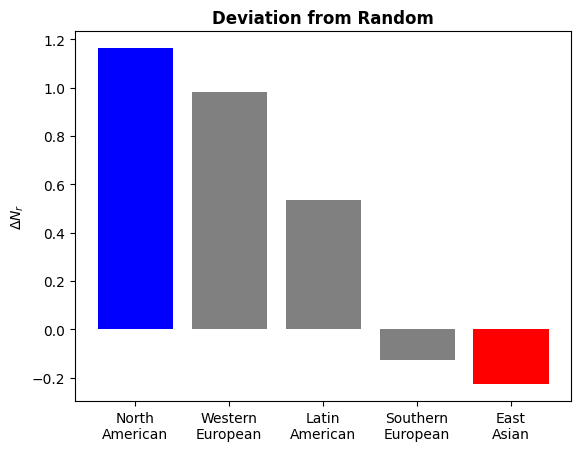

In [781]:
plt.bar(['North\nAmerican', 'Western\nEuropean', 'Latin\nAmerican', 'Southern\nEuropean', 'East\nAsian'],
          [np.mean(mean_shared_compounds_NorthAmerican) - np.mean(random_mean_shared_compounds_NorthAmerican),
           np.mean(mean_shared_compounds_WesternEuropean) - np.mean(random_mean_shared_compounds_WesternEuropean),
           np.mean(mean_shared_compounds_LatinAmerican) - np.mean(random_mean_shared_compounds_LatinAmerican),
           np.mean(mean_shared_compounds_SouthernEuropean) - np.mean(random_mean_shared_compounds_SouthernEuropean),
           np.mean(mean_shared_compounds_EastAsian) - np.mean(random_mean_shared_compounds_EastAsian)
           ], width=0.8, color=['blue', 'gray', 'gray', 'gray', 'red'])
plt.ylabel("$ \Delta N_{r}$")
plt.title('Deviation from Random', fontweight ="bold")
plt.show()
#plt.plot(['North\nAmerican', 'Western\nEuropean', 'Latin\nAmerican', 'Southern\nEuropean', 'East\nAsian'], [0, 0, 0, 0, 0], "k")

In [782]:
z_score_NorthAmerican = (np.mean(mean_shared_compounds_NorthAmerican) - np.mean(random_mean_shared_compounds_NorthAmerican))/(np.std(random_mean_shared_compounds_NorthAmerican)/100)
z_score_NorthAmerican

15.414174800633718

In [783]:
z_score_WesternEuropean = (np.mean(mean_shared_compounds_WesternEuropean) - np.mean(random_mean_shared_compounds_WesternEuropean))/(np.std(random_mean_shared_compounds_WesternEuropean)/100)
z_score_WesternEuropean

13.429287110254398

In [784]:
z_score_LatinAmerican = (np.mean(mean_shared_compounds_LatinAmerican) - np.mean(random_mean_shared_compounds_LatinAmerican))/(np.std(random_mean_shared_compounds_LatinAmerican)/100)
z_score_LatinAmerican

8.763164643824252

In [785]:
z_score_SouthernEuropean = (np.mean(mean_shared_compounds_SouthernEuropean) - np.mean(random_mean_shared_compounds_SouthernEuropean))/(np.std(random_mean_shared_compounds_SouthernEuropean)/100)
z_score_SouthernEuropean

-1.8081312392582978

In [786]:
z_score_EastAsian = (np.mean(mean_shared_compounds_EastAsian) - np.mean(random_mean_shared_compounds_EastAsian))/(np.std(random_mean_shared_compounds_EastAsian)/100)
z_score_EastAsian

-4.5008693564344755

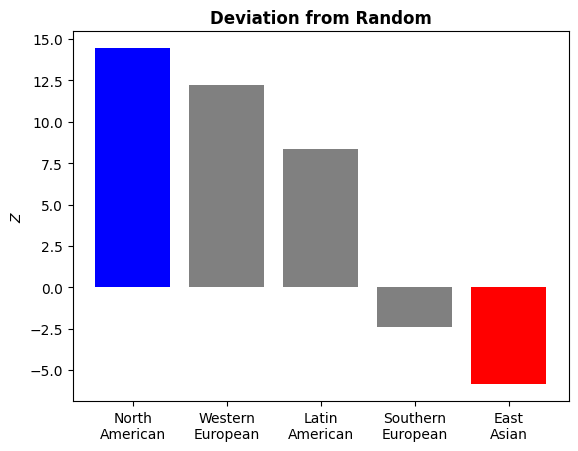

In [739]:
plt.bar(['North\nAmerican', 'Western\nEuropean', 'Latin\nAmerican', 'Southern\nEuropean', 'East\nAsian'],
          [z_score_NorthAmerican,
           z_score_WesternEuropean,
           z_score_LatinAmerican,
           z_score_SouthernEuropean,
           z_score_EastAsian
           ], width=0.8, color=['blue', 'gray', 'gray', 'gray', 'red'])

plt.ylabel("$ Z $")
plt.title('Deviation from Random', fontweight ="bold")
plt.show()

## Figure 3E and 3F

(E,F) The distributions P(Ns ) for 10,000 randomized recipe datasets compared with the real values for East Asian and North American cuisine. Both cuisines exhibit significant p-values, as estimated using a z-test.

Text(0.5, 1.0, 'North American')

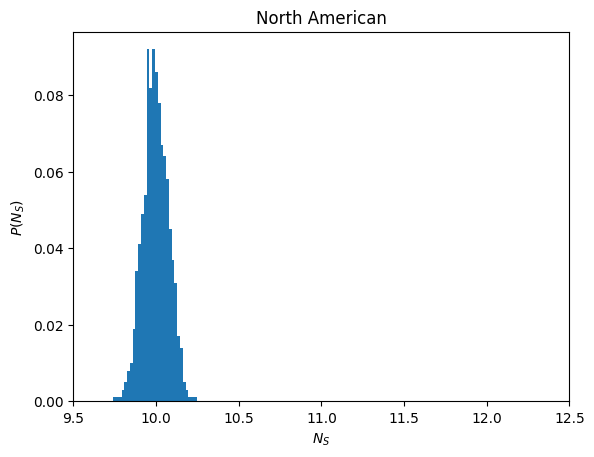

In [874]:
weights = np.ones_like(random_mean_shared_compounds_NorthAmerican_mu)/float(len(random_mean_shared_compounds_NorthAmerican_mu))
plt.hist(random_mean_shared_compounds_NorthAmerican_mu, bins=30, weights=weights)
plt.xlim([9.5,12.5])
plt.xlabel('$N_S$')
plt.ylabel('$P(N_S)$')
plt.title('North American')

Text(0.5, 1.0, 'East Asain')

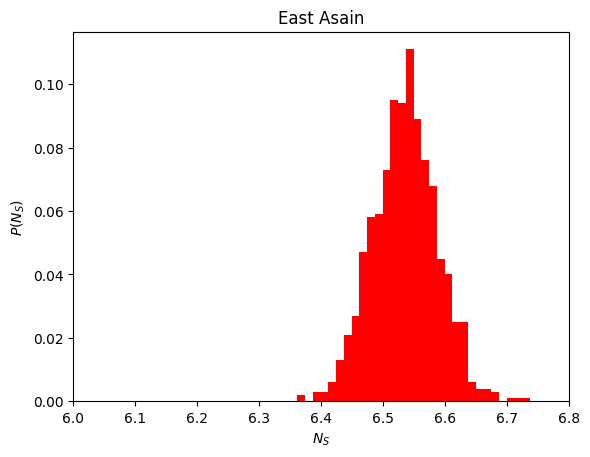

In [876]:
weights = np.ones_like(random_mean_shared_compounds_EastAsian_mu)/float(len(random_mean_shared_compounds_EastAsian_mu))

plt.hist(random_mean_shared_compounds_EastAsian_mu, bins=30, weights = weights, color='r')

plt.xlim([6,6.8])
plt.xlabel('$N_S$')
plt.ylabel('$P(N_S)$')
plt.title('East Asain')

In [ ]:
#getting compound contribution

In [746]:
#average number of common compounds - level of contribution
overall_mean_shared_compounds_NorthAmerican = np.mean(mean_shared_compounds_NorthAmerican)
NorthAmerican_frequency = []
for i in unique_NorthAmerican:
    NorthAmerican_frequency.append(NorthAmerican_recipes[NorthAmerican_recipes.map(lambda x: x == i).any(axis=1)].shape[0])
NorthAmerican_RankOrder['frequency'] = NorthAmerican_frequency

In [745]:
NorthAmerican_RankOrder

,ingredient,prevalence
0,cane_molasses,0.165591
1,scallion,0.055221
2,butter,0.411521
3,tomato,0.140208
4,olive_oil,0.133730
...,...,...
349,ouzo,0.000024
350,mung_bean,0.000024
351,mutton,0.000048
352,chinese_cabbage,0.000024


In [658]:
NorthAmerican_recipes

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
6807,cane_molasses,cherry,pineapple,mustard,ham,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6808,scallion,green_bell_pepper,ham,onion,thyme,bell_pepper,bay,smoked_sausage,garlic,parsley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6809,butter,corn_grit,black_pepper,milk_fat,garlic,cheddar_cheese,egg,milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6810,cane_molasses,thyme,onion,lime_juice,fish,cayenne,ginger,black_pepper,mango,garlic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6811,tomato,butter,green_bell_pepper,wheat,onion,cayenne,scallion,garlic,rice,shrimp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48326,provolone_cheese,wheat,yeast,chive,blue_cheese,pear,walnut,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48327,cane_molasses,vinegar,pepper,lemon_juice,onion,liver,cream_cheese,tamarind,pork_sausage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48328,tomato,fennel,garlic,oregano,pineapple,mozzarella_cheese,pork_sausage,bread,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48329,vanilla,pear,ginger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [673]:
# getting ingredient contributions
def get_real_ingredient_average_contribution(ingredient, frequency_df, regional_recipe_df):
    ingredient_recipe_df = regional_recipe_df[regional_recipe_df.map(lambda x: x == ingredient).any(axis=1)]
    recipe_contribution_sum = 0
    for index, recipe in ingredient_recipe_df.iterrows():
        recipe_ingredients = recipe[recipe.notna()].values
        if len(recipe_ingredients) > 1:
            ingredient_pairs = [ingredient+','+complimentary_ingredient for complimentary_ingredient in recipe_ingredients if ingredient!=complimentary_ingredient]
            compound_overlap = 0
            for pair in ingredient_pairs:
                compound_overlap += co_compound_dict.get(pair, 0)
            individual_recipe_contribution = (2/(len(recipe_ingredients)*(len(recipe_ingredients)-1)))*compound_overlap
            recipe_contribution_sum += individual_recipe_contribution
    return(recipe_contribution_sum/regional_recipe_df.shape[0])
            
                
        

In [716]:
def get_random_ingredient_average_contribution(ingredient, frequency_df, regional_recipe_df):
    numerator = 0
    denominator = 0
    ingredient_frequency = frequency_df.loc[frequency_df['ingredient']==ingredient]['frequency'].values[0]
    regional_average = NorthAmerican_recipes.count(axis=1).mean()
    for index, row in frequency_df.iterrows():
        if row['ingredient'] != ingredient:
            complimentary_ingredient = row['ingredient']
            complimentary_ingredient_frequency = row['frequency']
            denominator += complimentary_ingredient_frequency
            numerator += complimentary_ingredient_frequency*co_compound_dict.get(ingredient+','+complimentary_ingredient, 0)
    #print(numerator/denominator)
    #print(2*ingredient_frequency)
    #print(regional_recipe_df.shape[0]*regional_average)
    return((2*ingredient_frequency)/(regional_recipe_df.shape[0]*regional_average))*(numerator/denominator)
            

In [717]:
get_real_ingredient_average_contribution('milk', NorthAmerican_RankOrder, NorthAmerican_recipes)

2.032709599731241

In [718]:
get_random_ingredient_average_contribution('milk', NorthAmerican_RankOrder, NorthAmerican_recipes)

1.5035359322560096

In [719]:
get_real_ingredient_average_contribution('milk', NorthAmerican_RankOrder, NorthAmerican_recipes) - get_random_ingredient_average_contribution('milk', NorthAmerican_RankOrder, NorthAmerican_recipes)



0.5291736674752316

In [761]:
contributions = []
for i in NorthAmerican_RankOrder['ingredient']:
    contribution = get_real_ingredient_average_contribution(i, NorthAmerican_RankOrder, NorthAmerican_recipes) - get_random_ingredient_average_contribution(i, NorthAmerican_RankOrder, NorthAmerican_recipes)
    contributions.append(contribution)


In [762]:
NorthAmerican_RankOrder['contribution'] = contributions
NorthAmerican_RankOrder.sort_values('contribution', ascending=False)

,ingredient,prevalence,frequency,relative_prevalence,contribution
77,milk,0.264811,10996,0.036573,0.529174
2,butter,0.411521,17088,0.044358,0.511310
26,cocoa,0.104470,4338,0.019493,0.376588
45,vanilla,0.194610,8081,0.034870,0.238822
50,cream,0.195646,8124,0.015958,0.153994
...,...,...,...,...,...
125,chicken,0.089996,3737,-0.003706,-0.049830
14,onion,0.296479,12311,-0.022665,-0.052380
141,beef,0.075595,3139,-0.009753,-0.054363
118,white_wine,0.031090,1291,-0.007247,-0.055624


In [748]:
EastAsian_frequency = []
for i in unique_EastAsian:
    EastAsian_frequency.append(EastAsian_recipes[EastAsian_recipes.map(lambda x: x == i).any(axis=1)].shape[0])
EastAsian_RankOrder['frequency'] = EastAsian_frequency
EastAsian_RankOrder

,ingredient,prevalence,frequency
0,beef_broth,0.055334,139
1,sesame_oil,0.373010,937
2,vinegar,0.216162,543
3,beef,0.182723,459
4,garlic,0.518312,1302
...,...,...,...
237,cashew,0.000796,2
238,lentil,0.000398,1
239,veal,0.000796,2
240,malt,0.000398,1


In [749]:
contributions = []
for i in EastAsian_RankOrder['ingredient']:
    contribution = get_real_ingredient_average_contribution(i, EastAsian_RankOrder, EastAsian_recipes) - get_random_ingredient_average_contribution(i, EastAsian_RankOrder, EastAsian_recipes)
    contributions.append(contribution)

In [751]:
EastAsian_RankOrder['contribution'] = contributions

In [752]:
EastAsian_RankOrder.sort_values('contribution', ascending=False)

,ingredient,prevalence,frequency,contribution
27,rice,0.337978,849,0.166047
144,red_bean,0.012739,32,0.146370
146,milk,0.020303,51,0.045480
124,green_tea,0.005971,15,0.037390
92,mung_bean,0.005573,14,0.033855
...,...,...,...,...
53,cayenne,0.401274,1008,-0.115679
67,soybean,0.249602,627,-0.129545
8,pork,0.097532,245,-0.144149
46,ginger,0.325637,818,-0.194830


In [753]:
attribute_df

,ingredient,prevalence
0,chicken,0.093702
1,cane_molasses,0.135492
2,butter,0.367163
3,olive_oil,0.174236
4,honey,0.043948
...,...,...
376,mate,0.000018
377,soybean_oil,0.000035
378,holy_basil,0.000035
379,mutton,0.000053


In [755]:
def get_relative_prevalence(Rank_Order_df):
    intermediate_df = Rank_Order_df.merge(attribute_df, on= 'ingredient')
    intermediate_df['relative_prevalence'] = intermediate_df['prevalence_x'] - intermediate_df['prevalence_y']
    return(Rank_Order_df.merge(intermediate_df[['ingredient', 'relative_prevalence']], on='ingredient'))

In [757]:
EastAsian_RankOrder = get_relative_prevalence(EastAsian_RankOrder)
EastAsian_RankOrder

,ingredient,prevalence,frequency,contribution,relative_prevalence
0,beef_broth,0.055334,139,-1.564713e-03,0.040555
1,sesame_oil,0.373010,937,-1.183694e-02,0.349274
2,vinegar,0.216162,543,-3.137493e-02,0.079963
3,beef,0.182723,459,-3.638790e-01,0.097375
4,garlic,0.518312,1302,-6.495767e-02,0.219310
...,...,...,...,...,...
237,cashew,0.000796,2,-3.441772e-04,-0.002726
238,lentil,0.000398,1,-9.338510e-07,-0.004027
239,veal,0.000796,2,-7.862018e-04,-0.002708
240,malt,0.000398,1,-4.579875e-04,-0.000257


In [758]:
NorthAmerican_RankOrder = get_relative_prevalence(NorthAmerican_RankOrder)
NorthAmerican_RankOrder

,ingredient,prevalence,frequency,relative_prevalence
0,cane_molasses,0.165591,6876,0.030099
1,scallion,0.055221,2293,-0.021631
2,butter,0.411521,17088,0.044358
3,tomato,0.140208,5822,-0.035179
4,olive_oil,0.133730,5553,-0.040506
...,...,...,...,...
349,ouzo,0.000024,1,-0.000135
350,mung_bean,0.000024,1,-0.000312
351,mutton,0.000048,2,-0.000005
352,chinese_cabbage,0.000024,1,-0.002826


In [877]:
NorthAmerican_RankOrder.sort_values('relative_prevalence', ascending=False)[:50]

,ingredient,prevalence,frequency,relative_prevalence,contribution
2,butter,0.411521,17088,0.044358,0.511310
77,milk,0.264811,10996,0.036573,0.529174
45,vanilla,0.194610,8081,0.034870,0.238822
30,egg,0.403092,16738,0.032265,0.150682
12,wheat,0.398131,16532,0.030295,0.000504
0,cane_molasses,0.165591,6876,0.030099,0.001892
26,cocoa,0.104470,4338,0.019493,0.376588
50,cream,0.195646,8124,0.015958,0.153994
127,cream_cheese,0.061820,2567,0.011570,0.153900
99,pecan,0.049971,2075,0.011456,0.037590


## Figure 3I and 3J

(I,J) The contribution and frequency of use for each ingredient in North American and East Asian cuisine. The size of the circles represents the relative prevalence. North American and East Asian cuisine shows the opposite trends.

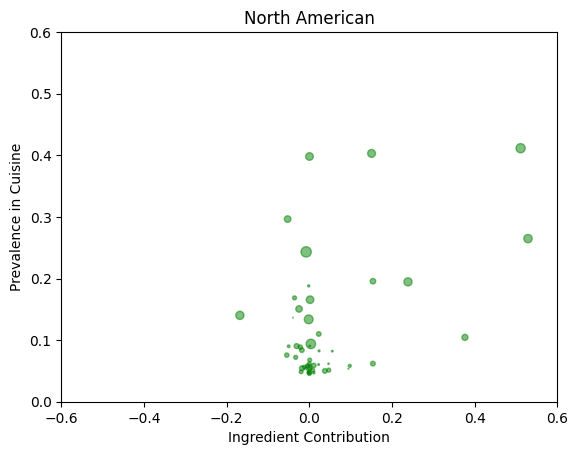

In [768]:
plt.scatter(NorthAmerican_RankOrder.sort_values('prevalence', ascending=False)[:50]['contribution'], NorthAmerican_RankOrder.sort_values('prevalence', ascending=False)[:50]['prevalence'], s=1000*np.absolute(NorthAmerican_RankOrder.sort_values('prevalence', ascending=False)[:50]['relative_prevalence']), c='green', alpha=0.5)
plt.xlim([-.6,.6])
plt.ylim([0,.6])
plt.xlabel("Ingredient Contribution")
plt.ylabel("Prevalence in Cuisine")
plt.title("North American")
plt.show()

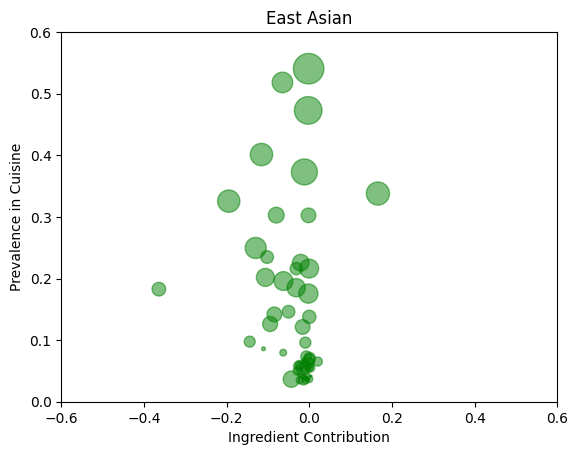

In [770]:
plt.scatter(EastAsian_RankOrder.sort_values('prevalence', ascending=False)[:50]['contribution'], EastAsian_RankOrder.sort_values('prevalence', ascending=False)[:50]['prevalence'], s=1000*np.absolute(EastAsian_RankOrder.sort_values('prevalence', ascending=False)[:50]['relative_prevalence']), c='green', alpha=0.5)
plt.xlim([-.6,.6])
plt.ylim([0,.6])
plt.xlabel("Ingredient Contribution")
plt.ylabel("Prevalence in Cuisine")
plt.title("East Asian")
plt.show()

In [799]:
#removing 30 ingredients and checking the z scores
def get_mean_shared_compounds_real(region, not_included_ingredients=[]):
    mean_shared_compounds_region = []
    for index, row in recipes_df.loc[recipes_df['region']==region].drop('region', axis=1).iterrows():
        ingredients = row[row.notna()].values
        ingredients = set(ingredients) - set(not_included_ingredients)
        ingredients = list(ingredients)
        #print(ingredients)
        n = len(ingredients)
        if n >= 2:
            ingredient_pairs = [comb[0]+','+comb[1] for comb in itertools.combinations(ingredients, 2)]
            num_shared_compounds = 0
            num_pairs = 0
            for i in ingredient_pairs:
                common_compounds = co_compound_dict.get(i, 0)
                num_shared_compounds += common_compounds
                if common_compounds > 0:
                    num_pairs += 1
            mean_shared_compounds = (2/(n*(n-1)))*num_shared_compounds
            mean_shared_compounds_region.append(mean_shared_compounds)
        
    return(mean_shared_compounds_region)

In [850]:
def get_random_mean_shared_compounds(regional_prevalence_df, region_recipe_df, not_included_ingredients=[]):
    #n is number of ingredients
    n_1 = region_recipe_df.sample(n=1).notna().sum().sum()
    
    #print(n)
    random_recipe_ingredients = regional_prevalence_df.sample(n=n_1, weights=regional_prevalence_df['prevalence'])['ingredient'].values
    random_recipe_ingredients = set(random_recipe_ingredients) - set(not_included_ingredients)
    random_recipe_ingredients = list(random_recipe_ingredients)
    n = len(random_recipe_ingredients)
    while n<=1:
        n_1+=1
        random_recipe_ingredients = regional_prevalence_df.sample(n=n_1, weights=regional_prevalence_df['prevalence'])['ingredient'].values
        random_recipe_ingredients = set(random_recipe_ingredients) - set(not_included_ingredients)
        random_recipe_ingredients = list(random_recipe_ingredients)
        n = len(random_recipe_ingredients)
    ingredient_combinations = []
    for comb in itertools.combinations(random_recipe_ingredients, 2):
        ingredient_combinations.append(comb[0] + ',' + comb[1])
    
    num_shared_compounds = 0
    num_pairs = 0
    for i in ingredient_combinations:
        common_compounds = co_compound_dict.get(i, 0)
        if common_compounds > 0:
            num_pairs +=1
            num_shared_compounds += common_compounds
    return(2/(n*(n-1))*num_shared_compounds)

In [807]:
mean_shared_compounds_w_removal = []
NorthAmerican_RankOrder_sorted = NorthAmerican_RankOrder.sort_values('contribution', ascending=False)
for i in range(0, 31):
    removed_ingredients = NorthAmerican_RankOrder_sorted[:i]['ingredient'].values
    #print(removed_ingredients)
    mean_shared_compounds_w_removal.append(np.mean(get_mean_shared_compounds_real('NorthAmerican',removed_ingredients)))


In [858]:
random_mean_shared_compounds_w_removal = []
random_mean_shared_compounds_w_removal_sd = []

for i in range(0, 31):
    print(i)
    removed_ingredients = NorthAmerican_RankOrder_sorted[:i]['ingredient'].values
    random_recipe_overlap_w_removal = []
    for j in range(10000):
        random_recipe_overlap_w_removal.append(get_random_mean_shared_compounds(NorthAmerican_RankOrder, NorthAmerican_recipes, removed_ingredients))
    #print(removed_ingredients)
    random_mean_shared_compounds_w_removal.append(np.mean(random_recipe_overlap_w_removal))
    random_mean_shared_compounds_w_removal_sd.append(np.std(random_recipe_overlap_w_removal))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [859]:
z_score_removed_NorthAmerican = (np.array(mean_shared_compounds_w_removal) - np.array(random_mean_shared_compounds_w_removal))/(np.array(random_mean_shared_compounds_w_removal)/100)
z_score_removed_NorthAmerican

array([14.98748341, 15.13574985,  9.8781685 ,  8.61521289,  7.7524289 ,
        7.82083525,  7.81630423,  6.25141073,  6.44520929,  5.05663769,
        3.66464615,  0.42175754,  2.16768782,  1.03527458,  0.28204332,
        0.26210952,  0.05349031,  0.26237871, -0.95838485, -1.89457563,
       -0.97389696, -1.36170069, -2.51331912, -2.97363652, -3.3012504 ,
       -1.82458228, -3.24736351, -2.6648972 , -2.46688813,  0.35309604,
       -1.83433213])

## Figure 3K and 3L

If we remove the highly contributing ingredients sequentially (from the largest contribution in North American cuisine and from the smallest contribution in East Asian cuisine), the shared compounds effect quickly vanishes when we removed five (East Asian) to fifteen (North American) ingredients.

Text(0.5, 1.0, 'North American')

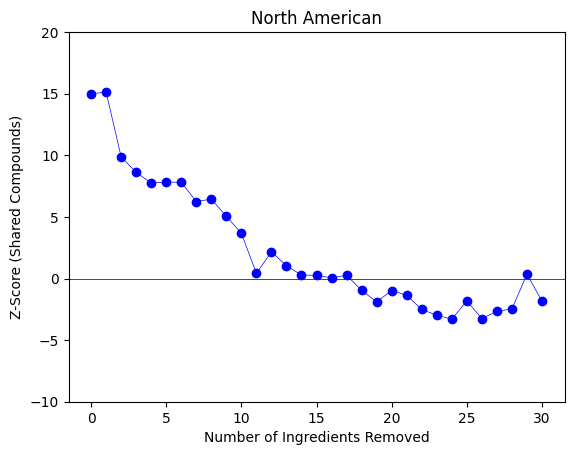

In [864]:
plt.axhline(y=0, color='black', linestyle='-', linewidth=.5)
plt.plot(range(0,31), z_score_removed_NorthAmerican, 'o-', c='blue', label='North American', linewidth=.5) 
plt.ylim([-10,20])
plt.xlabel("Number of Ingredients Removed")
plt.ylabel("Z-Score (Shared Compounds)")
plt.title("North American")

In [828]:
EastAsian_mean_shared_compounds_w_removal = []
EastAsian_RankOrder_sorted = EastAsian_RankOrder.sort_values('contribution', ascending=True)
for i in range(0, 31):
    removed_ingredients = EastAsian_RankOrder_sorted[:i]['ingredient'].values
    #print(removed_ingredients)
    EastAsian_mean_shared_compounds_w_removal.append(np.mean(get_mean_shared_compounds_real('EastAsian',removed_ingredients)))


In [845]:
get_random_mean_shared_compounds(EastAsian_RankOrder, EastAsian_recipes, removed_ingredients)

9.604395604395606

In [854]:
EastAsian_random_mean_shared_compounds_w_removal = []
EastAsian_random_mean_shared_compounds_w_removal_sd = []

for i in range(0, 31):
    removed_ingredients = EastAsian_RankOrder_sorted[:i]['ingredient'].values
    random_recipe_overlap_w_removal = []
    for j in range(10000):
        random_recipe_overlap_w_removal.append(get_random_mean_shared_compounds(EastAsian_RankOrder, EastAsian_recipes, removed_ingredients))
    #print(removed_ingredients)
    EastAsian_random_mean_shared_compounds_w_removal.append(np.mean(random_recipe_overlap_w_removal))
    EastAsian_random_mean_shared_compounds_w_removal_sd.append(np.std(random_recipe_overlap_w_removal))


In [855]:
z_score_removed_EastAsian = (np.array(EastAsian_mean_shared_compounds_w_removal) - np.array(EastAsian_random_mean_shared_compounds_w_removal))/(np.array(EastAsian_random_mean_shared_compounds_w_removal_sd)/100)
z_score_removed_EastAsian

array([-6.25408661e+00, -1.00765266e+00, -2.35701716e+00, -3.26512830e+00,
       -1.36279185e+00, -2.00024380e+00, -2.64247652e+00,  2.37681349e+00,
        3.07053651e-01,  2.75087668e+00,  1.84906980e+00,  9.98214900e-01,
       -3.73963746e-01,  6.65717559e-01, -2.01372718e+00, -7.34556698e-01,
       -9.73035296e-01, -2.16602576e+00, -1.56418392e-01, -1.49506516e-01,
       -8.35151113e-01,  1.53960010e-03,  3.27962492e+00,  3.27483120e+00,
        3.92984392e+00,  1.10180359e+00,  2.96550143e+00,  3.03442464e+00,
        3.97436421e+00,  2.92996591e+00,  4.21347675e-01])

Text(0.5, 1.0, 'East Asiain')

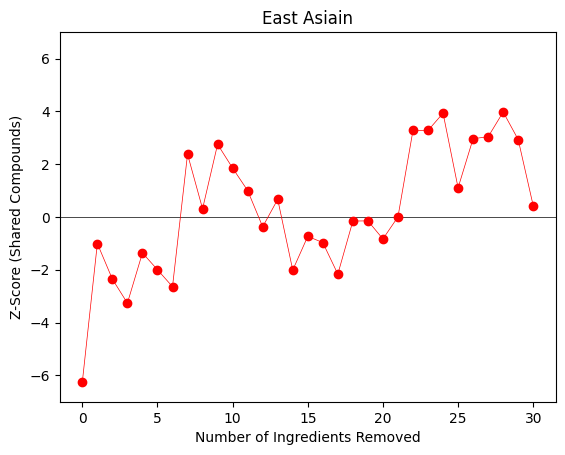

In [862]:

plt.axhline(y=0, color='black', linestyle='-', linewidth=.5)
plt.plot(range(0,31), z_score_removed_EastAsian, 'o-', c='red', label='East Asian', linewidth=.5) 
plt.ylim([-7,7])
plt.xlabel("Number of Ingredients Removed")
plt.ylabel("Z-Score (Shared Compounds)")
plt.title("East Asiain")

In [878]:
NorthAmerican_RankOrder.sort_values('relative_prevalence', ascending=False)[:6]

,ingredient,prevalence,frequency,relative_prevalence,contribution
2,butter,0.411521,17088,0.044358,0.511310
77,milk,0.264811,10996,0.036573,0.529174
45,vanilla,0.194610,8081,0.034870,0.238822
30,egg,0.403092,16738,0.032265,0.150682
12,wheat,0.398131,16532,0.030295,0.000504
0,cane_molasses,0.165591,6876,0.030099,0.001892


## Figure 4A and 4B

(A,B) Flavor pyramids for North American and East Asian cuisines. Each flavor pyramid shows the six most authentic ingredients (i.e. those with the largest $p_i^c$), ingredient pairs (largest $p_{ij}^c$) and ingredient triplets (largest $p_{ijk}^c$). The size of the nodes reflects the abundance $p_i^c$ of the ingredient in the recipes of the particular cuisine. Each color represents the category of the ingredient (see Fig. 2 for the color) and link thickness indicates the number of shared compounds.

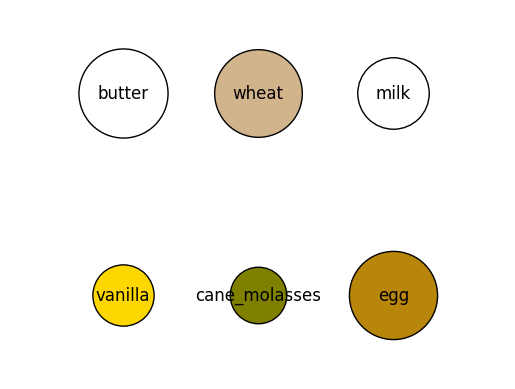

In [899]:
G=nx.grid_2d_graph(2,3)  #4x4 grid


plt.subplot(221)
nx.draw(ingredient_g.subgraph('butter'),node_color='white', edgecolors='black', with_labels=True, node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*10000)

plt.subplot(222)
nx.draw(ingredient_g.subgraph('milk'),node_color='white', edgecolors='black', with_labels=True, node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='milk']['prevalence'].values*10000)

plt.subplot(223)
nx.draw(ingredient_g.subgraph('vanilla'),node_color='gold',edgecolors='black', node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*10000,with_labels=True)

plt.subplot(224)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('egg'),node_color='darkgoldenrod',edgecolors='black', node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*10000,with_labels=True)

plt.subplot(211)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('wheat'),node_color='tan',edgecolors='black', node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*10000,with_labels=True)

plt.subplot(212)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('cane_molasses'),node_color='olive',edgecolors='black', node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='cane_molasses']['prevalence'].values*10000,with_labels=True)



plt.show()

In [942]:
ingredient_g.subgraph(['butter', 'vanilla']).edges[['butter', 'vanilla']].get('weight')

33

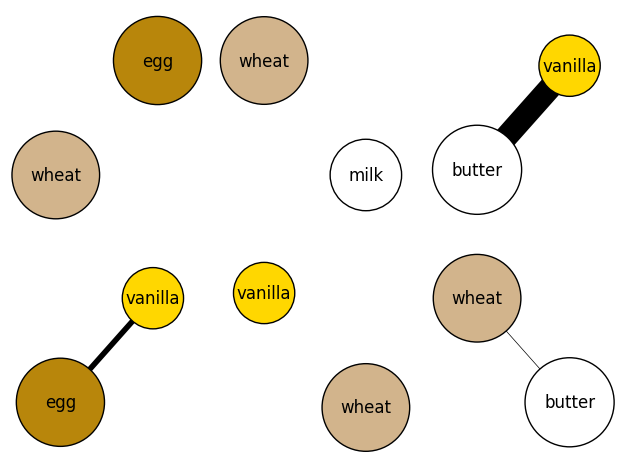

In [948]:
fig, all_axes = plt.subplots(2, 3)
ax = all_axes.flat


nx.draw(ingredient_g.subgraph(['egg', 'wheat']),node_color=['darkgoldenrod', 'tan'], edgecolors='black', with_labels=True, node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*10000], ax=ax[0])

# plt.subplot(222)
nx.draw(ingredient_g.subgraph(['milk', 'wheat']),node_color=['white', 'tan'], edgecolors='black', with_labels=True, node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='milk']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*10000], ax=ax[1])

# plt.subplot(223)
nx.draw(ingredient_g.subgraph(['vanilla', 'butter']),node_color=['gold', 'white'],edgecolors='black', node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*10000],with_labels=True, ax=ax[2], width=ingredient_g.subgraph(['vanilla', 'butter']).edges[['vanilla', 'butter']].get('weight')/2)

# plt.subplot(224)
nx.draw(ingredient_g.subgraph(['egg', 'vanilla']),node_color=['gold', 'darkgoldenrod'],edgecolors='black', node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*10000],with_labels=True, ax=ax[3], width=ingredient_g.subgraph(['egg', 'vanilla']).edges[['egg', 'vanilla']].get('weight')/2)

# plt.subplot(225)
nx.draw(ingredient_g.subgraph(['wheat', 'vanilla']),node_color=['gold', 'tan'],edgecolors='black', node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*10000],with_labels=True, ax=ax[4])

# plt.subplot(226)
nx.draw(ingredient_g.subgraph(['butter', 'wheat']),node_color=['white', 'tan'],edgecolors='black', node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*10000],with_labels=True, ax=ax[5], width=ingredient_g.subgraph(['butter', 'wheat']).edges[['butter', 'wheat']].get('weight')/2)

for a in ax:
    a.margins(0.45)
fig.tight_layout()

plt.show()

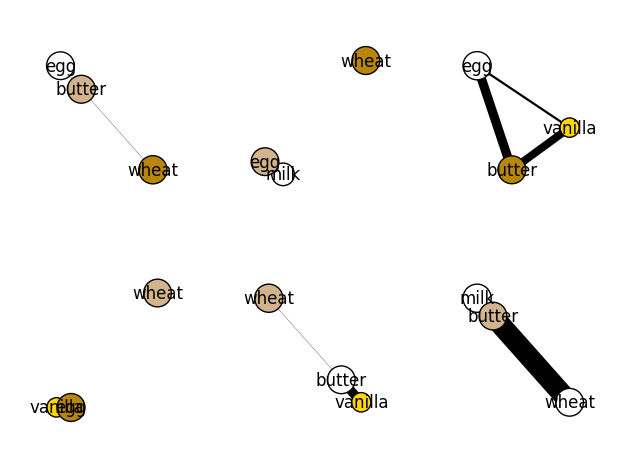

In [965]:
fig, all_axes = plt.subplots(2, 3)
ax = all_axes.flat


nx.draw(ingredient_g.subgraph(['egg', 'wheat', 'butter']),
        node_color=['tan', 'white', 'darkgoldenrod'], 
        edgecolors='black', 
        with_labels=True, 
        node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*1000],
        width=[ingredient_g.subgraph(['wheat', 'butter']).edges[['wheat', 'butter']].get('weight')/5, ingredient_g.subgraph(['wheat', 'butter']).edges[['wheat', 'butter']].get('weight')/5],
        ax=ax[0])

# plt.subplot(222)
nx.draw(ingredient_g.subgraph(['milk', 'wheat', 'egg']),node_color=['white', 'tan', 'darkgoldenrod'], 
        edgecolors='black', 
        with_labels=True, 
        node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='milk']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*1000], 
        ax=ax[1])

# plt.subplot(223)
nx.draw(ingredient_g.subgraph(['vanilla', 'butter', 'egg']),
        node_color=['gold', 'white', 'darkgoldenrod'],edgecolors='black', node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*1000],
        with_labels=True, 
        ax=ax[2], 
        width=[ingredient_g.subgraph(['egg', 'butter']).edges[['egg', 'butter']].get('weight')/5,ingredient_g.subgraph(['egg', 'vanilla']).edges[['egg', 'vanilla']].get('weight')/5,ingredient_g.subgraph(['vanilla', 'butter']).edges[['vanilla', 'butter']].get('weight')/5] )

# plt.subplot(224)
nx.draw(ingredient_g.subgraph(['egg', 'vanilla', 'wheat']),node_color=['gold', 'darkgoldenrod', 'tan'],
        edgecolors='black', 
        node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000],
        with_labels=True, 
        ax=ax[3], 
        width=[ingredient_g.subgraph(['egg', 'vanilla']).edges[['egg', 'vanilla']].get('weight')/5])

# plt.subplot(225)
nx.draw(ingredient_g.subgraph(['wheat', 'vanilla', 'butter']),
        node_color=['gold', 'white', 'tan'],edgecolors='black', 
        node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*1000],
        with_labels=True, 
        ax=ax[4],
        width=[ingredient_g.subgraph(['butter', 'vanilla']).edges[['butter', 'vanilla']].get('weight')/5, ingredient_g.subgraph(['butter', 'wheat']).edges[['butter', 'wheat']].get('weight')/5])

# plt.subplot(226)
nx.draw(ingredient_g.subgraph(['butter', 'wheat', 'milk']),
        node_color=['white', 'tan', 'white'],
        edgecolors='black', 
        node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000],with_labels=True, 
        ax=ax[5], 
        width=[ingredient_g.subgraph(['butter', 'wheat']).edges[['butter', 'wheat']].get('weight')/5, ingredient_g.subgraph(['butter', 'milk']).edges[['butter', 'milk']].get('weight')/5])

for a in ax:
    a.margins(0.45)
fig.tight_layout()

plt.show()

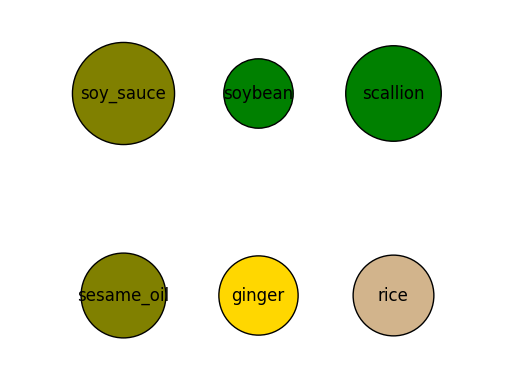

In [969]:
plt.subplot(221)
nx.draw(ingredient_g.subgraph('soy_sauce'),
        node_color='olive', 
        edgecolors='black', 
        with_labels=True, 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000)

plt.subplot(222)
nx.draw(ingredient_g.subgraph('scallion'),
        node_color='g', edgecolors='black',
        with_labels=True, 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*10000)

plt.subplot(223)
nx.draw(ingredient_g.subgraph('sesame_oil'),
        node_color='olive',edgecolors='black', 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*10000,
        with_labels=True)

plt.subplot(224)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('rice'),
        node_color='tan',
        edgecolors='black', 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='rice']['prevalence'].values*10000,
        with_labels=True)

plt.subplot(211)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('soybean'),
        node_color='g',edgecolors='black', 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soybean']['prevalence'].values*10000,
        with_labels=True)

plt.subplot(212)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('ginger'),
        node_color='gold',
        edgecolors='black', 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='ginger']['prevalence'].values*10000,
        with_labels=True)



plt.show()

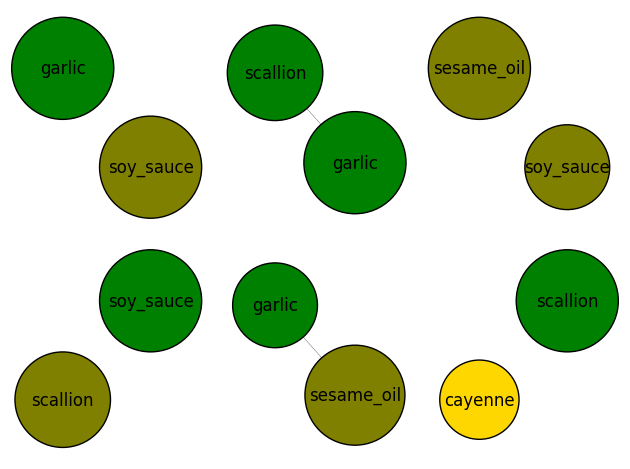

In [996]:
fig, all_axes = plt.subplots(2, 3)
ax = all_axes.flat

nx.draw(ingredient_g.subgraph(['soy_sauce', 'garlic']),
        node_color=['olive' , 'g'], 
        edgecolors='black', 
        with_labels=True, 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000,EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000],
        ax=ax[0])


nx.draw(ingredient_g.subgraph(['scallion', 'garlic']),
        node_color=['g', 'g'], edgecolors='black',
        with_labels=True, 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*10000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000],
        ax=ax[1],
        width=[ingredient_g.subgraph(['scallion', 'garlic']).edges[['scallion', 'garlic']].get('weight')/5])


nx.draw(ingredient_g.subgraph(['sesame_oil', 'soy_sauce']),
        node_color='olive',edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*10000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000],
        with_labels=True,
        ax=ax[2])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['soy_sauce', 'scallion']),
        node_color=['olive', 'g'],
        edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*10000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000],
        with_labels=True,
        ax=ax[3])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['garlic', 'sesame_oil']),
        node_color=['olive', 'g'],edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='garlic']['prevalence'].values*10000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*10000],
        with_labels=True,
        ax=ax[4],
        width=[ingredient_g.subgraph(['sesame_oil', 'garlic']).edges[['sesame_oil', 'garlic']].get('weight')/5])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['scallion', 'cayenne']),
        node_color=['gold', 'g'],
        edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='ginger']['prevalence'].values*10000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000],
        with_labels=True,
        ax=ax[5])


for a in ax:
    a.margins(0.6)
fig.tight_layout()

plt.show()

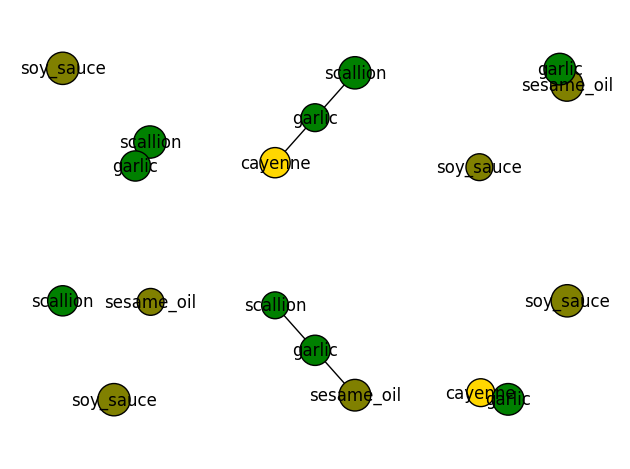

In [1001]:
fig, all_axes = plt.subplots(2, 3)
ax = all_axes.flat

nx.draw(ingredient_g.subgraph(['soy_sauce', 'garlic', 'scallion']),
        node_color=['g','olive','g'], 
        edgecolors='black', 
        with_labels=True, 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000,EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000,EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*1000],
        ax=ax[0])


nx.draw(ingredient_g.subgraph(['scallion', 'garlic', 'cayenne']),
        node_color=['gold', 'g', 'g'], edgecolors='black',
        with_labels=True, 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='cayenne']['prevalence'].values*1000],
        ax=ax[1])


nx.draw(ingredient_g.subgraph(['sesame_oil', 'soy_sauce', 'garlic']),
        node_color=['olive', 'olive', 'g'],edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000,EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='garlic']['prevalence'].values*1000],
        with_labels=True,
        ax=ax[2])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['soy_sauce', 'scallion', 'sesame_oil']),
        node_color=['g', 'olive', 'olive'],
        edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*1000],
        with_labels=True,
        ax=ax[3])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['garlic', 'sesame_oil', 'scallion']),
        node_color=['olive', 'g', 'g'],edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='garlic']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*1000],
        with_labels=True,
        ax=ax[4])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['soy_sauce', 'cayenne', 'garlic']),
        node_color=['gold', 'olive', 'g'],
        edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='cayenne']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='garlic']['prevalence'].values*1000],
        with_labels=True,
        ax=ax[5])


for a in ax:
    a.margins(0.6)
fig.tight_layout()

plt.show()